# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
def resumen_por_columna(df:pd.DataFrame,cols:list)->pd.DataFrame:
    """
    resumen_por_columna(df,cols)

    Resumen de informacion de columnas de un dataframe dado

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe al cual resumir informacion de columna
        
    cols : list
        Arreglo con los nombres de las columnas a resumir información
    Returns
    -------
    output : pd.DataFrame
        DataFrame con información de valores unicos y valores nulos de las columnas entregadas

    """
    pd_series = df[cols]
    l_unique = pd_series.unique()# elementos distintos
    l_vacios = pd_series[pd_series.isna()]# elementos vacios
    df_info = pd.DataFrame({#Creacion del Dataframe a retornar
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    return df_info

conteo= resumen_por_columna(df,'species')#Mediante la función se realiza un conteo de valores únicos y vacíos
conteo

,columna,unicos,vacios
0,species,11,1


In [4]:
#Se da formato de minusculas y se eliminan espacios
df['species']=df['species'].str.lower().str.strip()

#Se reemplaca por 'default' los valores nan
df.loc[df['species'].isnull(),'species'] = 'default'

#Se presenta un nuevo conteo ahora sin valores nan y con las especies con formato correcto
conteo= resumen_por_columna(df,'species')
conteo

,columna,unicos,vacios
0,species,4,0


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

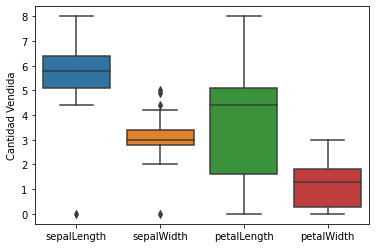

In [5]:
#Se reemplazan por 0 los valores nan de cada columna menos de 'species'
df.loc[df['sepalLength'].isnull(),'sepalLength'] = 0
df.loc[df['sepalWidth'].isnull(),'sepalWidth'] = 0
df.loc[df['petalLength'].isnull(),'petalLength'] = 0
df.loc[df['petalWidth'].isnull(),'petalWidth'] = 0

# Definición de dataframe con solo las columnas de interés
lenwid_df = df.drop(['species'], axis=1)
 
# Creación del Box-Plot
# sns.set(font_scale = 1.2) #incremento del tamaño de letras
sns.boxplot(data=lenwid_df).set(ylabel='Cantidad Vendida')

plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [6]:
#Definición de mask's de los rangos validos para cada valor
sep_len = (df['sepalLength'] >= 4.0) & (df['sepalLength'] <=7.0)
sep_wid = (df['sepalWidth'] >= 2.0) & (df['sepalWidth'] <=4.5)
pet_len = (df['petalLength'] >= 1.0) & (df['petalLength'] <=7.0)
pet_wid = (df['petalWidth'] >= 0.1) & (df['petalWidth'] <=2.5)

#Definición de mask total de valores validos
rangos = sep_len & sep_wid & pet_len & pet_wid

#Definicion de Dataframe con columna 'label'
filtro = pd.DataFrame({'label' : rangos})

#Creación de nuevo DataFrame con la columna agregada
df_filtrado = pd.concat([df,filtro],axis=1, sort=False)
df_filtrado

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

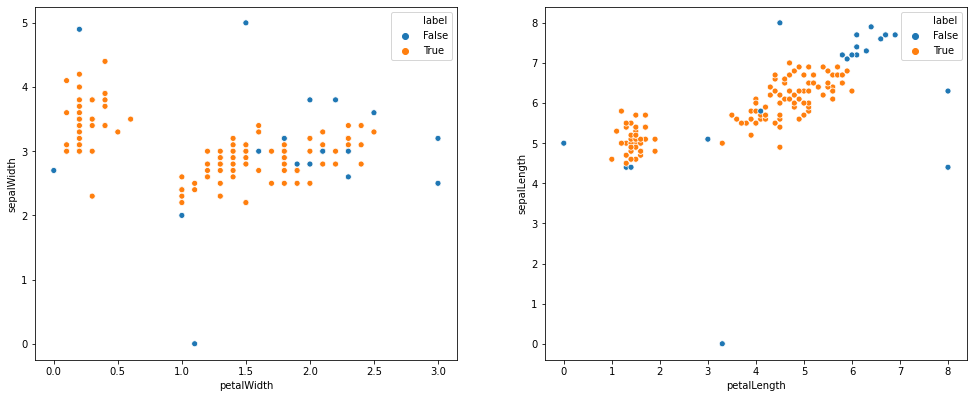

In [7]:
fig = plt.figure(figsize = (15, 7))
ax1 = plt.subplot(1,2,2)
ax2 = plt.subplot(1,2,1)


#Grafico sepalLength vs petalLength
sns.scatterplot(
    x='petalLength',
    y='sepalLength',    
    hue='label',
    data=df_filtrado,
    ax=ax1
)
#Grafico sepalWidth vs petalWidth 
sns.scatterplot(
    x='petalWidth',
    y='sepalWidth',
    hue='label',
    data=df_filtrado,
    ax=ax2
)
fig.tight_layout(pad=6.0) #Separación entre gráficos
#En ese orden se entendío el versus del gráfico

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

In [8]:
#Definición de mask para filtrar mediante los rangos de valides de los valores
mask_label=(df_filtrado['label'] == True)

#Definición de mask para filtrar los valores nan previamente modificados a 'default'
mask_species = (df_filtrado['species'] != 'default')

#Definición del DataFrame final con los valores formateados y filtrados
df_final = df_filtrado[mask_label & mask_species].reset_index()

df_final.head()

,index,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,2,6.3,3.3,6.0,2.5,virginica,True
1,3,6.7,3.3,5.7,2.5,virginica,True
2,4,6.3,3.4,5.6,2.4,virginica,True
3,5,6.7,3.1,5.6,2.4,virginica,True
4,6,5.8,2.8,5.1,2.4,virginica,True


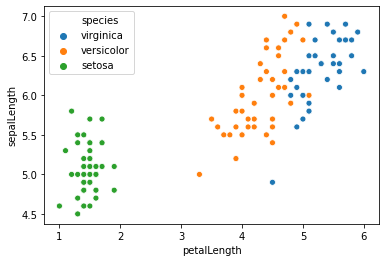

In [9]:
#Gráfico de sepalLength vs petalLength categorizados por la etiqueta 'species'
sns.scatterplot(
    x='petalLength',
    y='sepalLength',
    hue='species',
    data=df_final,
)
plt.show()
#En ese orden se entendío el versus del gráfico